#### Gasolina Regular

In [1]:
import pandas as pd

# Cargar los datos desde el archivo Excel
df_consumo = pd.read_excel("Datos Originales/Consumo.xlsx")

# Convertir la columna "Fecha" a formato datetime
df_consumo["Fecha"] = pd.to_datetime(df_consumo["Fecha"])

# Filtrar la serie de Gasolina Regular
serie_regular = df_consumo[["Fecha", "Gasolina regular"]].dropna()

# Establecer la columna "Fecha" como índice
serie_regular.set_index("Fecha", inplace=True)

# Especificar las propiedades de la serie
inicio = serie_regular.index.min()
fin = serie_regular.index.max()
frecuencia = pd.infer_freq(serie_regular.index)

# Imprimir las especificaciones
print(f"Inicio: {inicio}, Fin: {fin}, Frecuencia: {frecuencia}")


Inicio: 2000-01-01 00:00:00, Fin: 2024-12-01 00:00:00, Frecuencia: MS


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Suponiendo que ya cargaste tu serie como un DataFrame
serie = serie_regular["Gasolina regular"].values.reshape(-1, 1)

# Normalizar
scaler = MinMaxScaler()
serie_scaled = scaler.fit_transform(serie)

# Función para crear secuencias
def crear_secuencias(data, n_steps=12):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

n_steps = 12
X, y = crear_secuencias(serie_scaled, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

Modelo 1 LSTM

In [14]:
model1 = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

model1.compile(optimizer='adam', loss='mse')
model1.fit(X, y, epochs=30, batch_size=16, verbose=1)

Epoch 1/30


C:\Users\jemil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1543
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0381
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 13/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022
Epoch 14/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025
Epoch 15/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027
Epoch 16/30
18/18 ━━━━━━━━━

Modelo 2

In [15]:
model2 = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(1)
])

model2.compile(optimizer='adam', loss='mse')
model2.fit(X, y, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1565
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0353
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0188
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0127
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0054
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0035
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0032
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0031
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0026
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0025
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0026
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0029
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0026
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0023
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
RMSE Modelo 1: 35972.97
RMSE Modelo 2: 37607.37


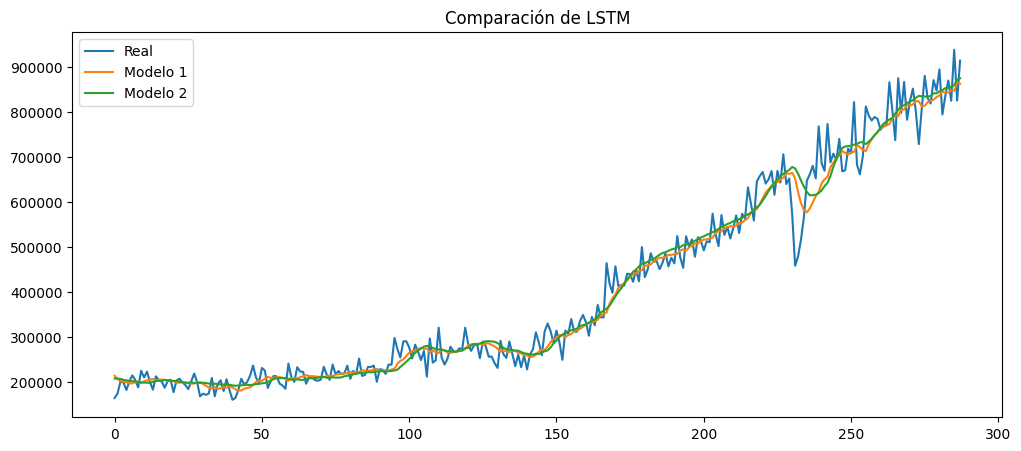

In [16]:
# Predicciones
pred1 = model1.predict(X)
pred2 = model2.predict(X)

# Invertir normalización
pred1 = scaler.inverse_transform(pred1)
pred2 = scaler.inverse_transform(pred2)
y_true = scaler.inverse_transform(y.reshape(-1, 1))

# Métricas
rmse1 = np.sqrt(mean_squared_error(y_true, pred1))
rmse2 = np.sqrt(mean_squared_error(y_true, pred2))
print(f"RMSE Modelo 1: {rmse1:.2f}")
print(f"RMSE Modelo 2: {rmse2:.2f}")

# Plot
plt.figure(figsize=(12,5))
plt.plot(y_true, label='Real')
plt.plot(pred1, label='Modelo 1')
plt.plot(pred2, label='Modelo 2')
plt.legend()
plt.title("Comparación de LSTM")
plt.show()


Estos valores indican que, en promedio, los modelos tienen un error de ±36 mil unidades respecto al valor real. Dado que los valores de la serie están entre 200,000 y 900,000, esto representa un error de aproximadamente 4%–5%, lo cual puede considerarse razonable, pero todavía hay espacio para mejora.